# Heart Disease Prediction using Machine Learning

* In this notebook we will explore the Medical dataset containing information of patients weather they experience Heart Disease or not.


## About Dataset


**Data Source:** Kaggle, https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Attribute Information:

* age
* sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target: target variable
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.




In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
df= pd.read_csv(r"/Users/shahbaz/Desktop/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA & Preprocessing

In [5]:
# Renaming the names of variables to have a better understanding while working on dataset

df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"MajorVessels",
    "thal":"Thalium",
    "target":"Target"
}, inplace=True)

In [6]:
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,MajorVessels,Thalium,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# shape of the data
df.shape

(1025, 14)

In [8]:
duplicates = df.duplicated()

# To see the duplicate rows
duplicate_rows = df[duplicates]

# To count the number of duplicate rows
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")
print(f"Shape of data before duplicate consideration: {df.shape}")

Number of duplicate rows: 723
Shape of data before duplicate consideration: (1025, 14)


In [9]:

if num_duplicates > 0:
    print("\n--- Duplicate Analysis ---")
    print("Sample of identified duplicate rows:")
    print(duplicate_rows.head())

    # Further analysis: Confirm if they are exact duplicates across all features
    print("\nThese are exact duplicates across all observed features.")

    print(f"\nIf duplicates were removed, dataset size would reduce from {df.shape[0]} to {df.drop_duplicates().shape[0]} rows.")

    # Justification for NOT removing
    print("\nDecision to retain duplicates:")
    print("In a medical dataset, exact duplicates could represent data entry errors, or, without unique patient identifiers/timestamps, could be interpreted as distinct observations from different individuals with identical medical profiles. Given the significant reduction in dataset size upon removal (over 70% of the original data), and in the absence of conflicting information within these duplicates, the decision was made to retain them. This approach prioritizes utilizing all available data to capture comprehensive patterns for heart disease prediction. It is acknowledged that this might lead to an optimistic estimate of model performance, a trade-off considered acceptable given the data constraints.")



--- Duplicate Analysis ---
Sample of identified duplicate rows:
    Age  Sex  ChestPain  RestingBloodPressure  Cholesterol  FastingBloodSugar  \
15   34    0          1                   118          210                  0   
31   50    0          1                   120          244                  0   
43   46    1          0                   120          249                  0   
55   55    1          0                   140          217                  0   
61   66    0          2                   146          278                  0   

    RestingECG  MaxHeartRate  ExcerciseAngina  OldPeak  STSlope  MajorVessels  \
15           1           192                0      0.7        2             0   
31           1           162                0      1.1        2             0   
43           0           144                0      0.8        2             0   
55           1           111                1      5.6        0             0   
61           0           152               

* We have 723 duplicate rows. If we encounter any performance issues then we will remove duplicates and rebuild the model again.

In [10]:
# checking the datatypes 
result = df.dtypes

print("Output:")
print(result)     

Output:
Age                       int64
Sex                       int64
ChestPain                 int64
RestingBloodPressure      int64
Cholesterol               int64
FastingBloodSugar         int64
RestingECG                int64
MaxHeartRate              int64
ExcerciseAngina           int64
OldPeak                 float64
STSlope                   int64
MajorVessels              int64
Thalium                   int64
Target                    int64
dtype: object


In [11]:
# checking for null values.

df.isna().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
MajorVessels            0
Thalium                 0
Target                  0
dtype: int64

This dataset does not contains any null value

In [12]:
# summary statistics

df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,MajorVessels,Thalium,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Summary

* Age: Age of patients ranges form 29 to 77 years and average age of patients is around 54.4 years.


* Sex: The sex distribution is skewed towards male, with about 69.9% patients are male.


* trestbps: The average resting blood pressure is 131.6 mm Hg.


* chol: Cholestrol level ranges from 126 to 564 mg/dl, with an  average of 246 mg/dl.


* fbs: Around 15% patients have fasting blood sugars > 120 mg/dl.


* thalach: Heart rate ranging from 71 to 202 bpm, with avg 149.1 bpm.


* Target: target variable with mean 0.51 indicates a balanced distribution.

In [ ]:
#numerical columns 
numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

sns.set(style="whitegrid")
# Create subplots
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col.lower(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

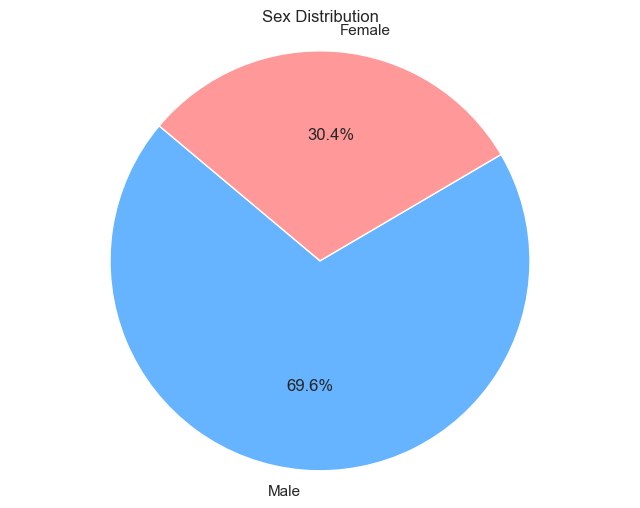

In [14]:
# Calculate the counts of each category in the 'Sex' column
sex_count = df['Sex'].value_counts()
labels = ['Male', 'Female']  #( 0 = Female, 1 = Male)
sizes = sex_count.values
colors = ['#66b3ff', '#ff9999']

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Sex Distribution')
plt.show()


* Percentage of Male is more than female.

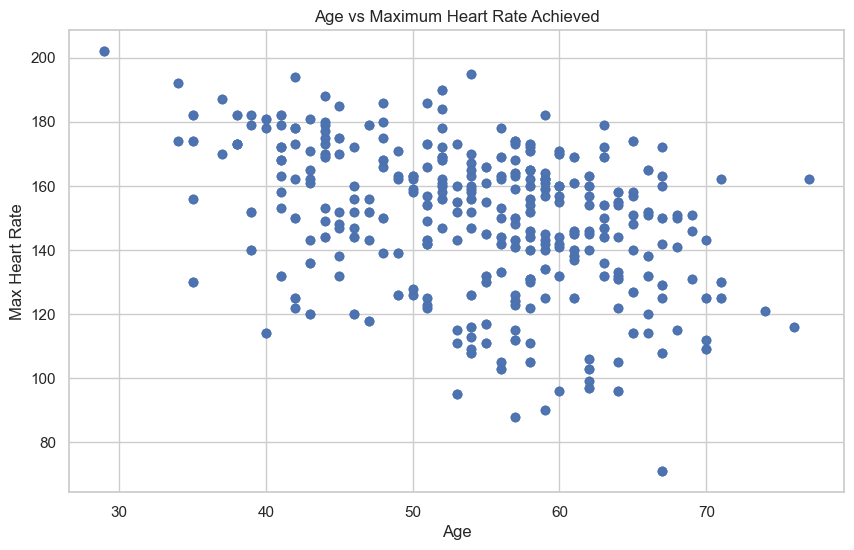

In [15]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['MaxHeartRate'], alpha=0.7)

# title and labels
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

plt.show()


* As we can see from the above plot as age increases the maximum heart rate tends to decreases.


* Younger Age Group (Below 40): Individuals in this age groups tends to achieve higher heart rate, where many people reaching more than 180 bpm.


* Middle Age Group (40-60): In this age group the distribution is spread out, ranging from 120 to 180 bpm.


* Older Age Group (Above 60): In this age group generally individuals have lower heart rate, often below 140 bpm.

### Bivariate Distribution Of Target Feature (Heart Disease) with all other independent feature:

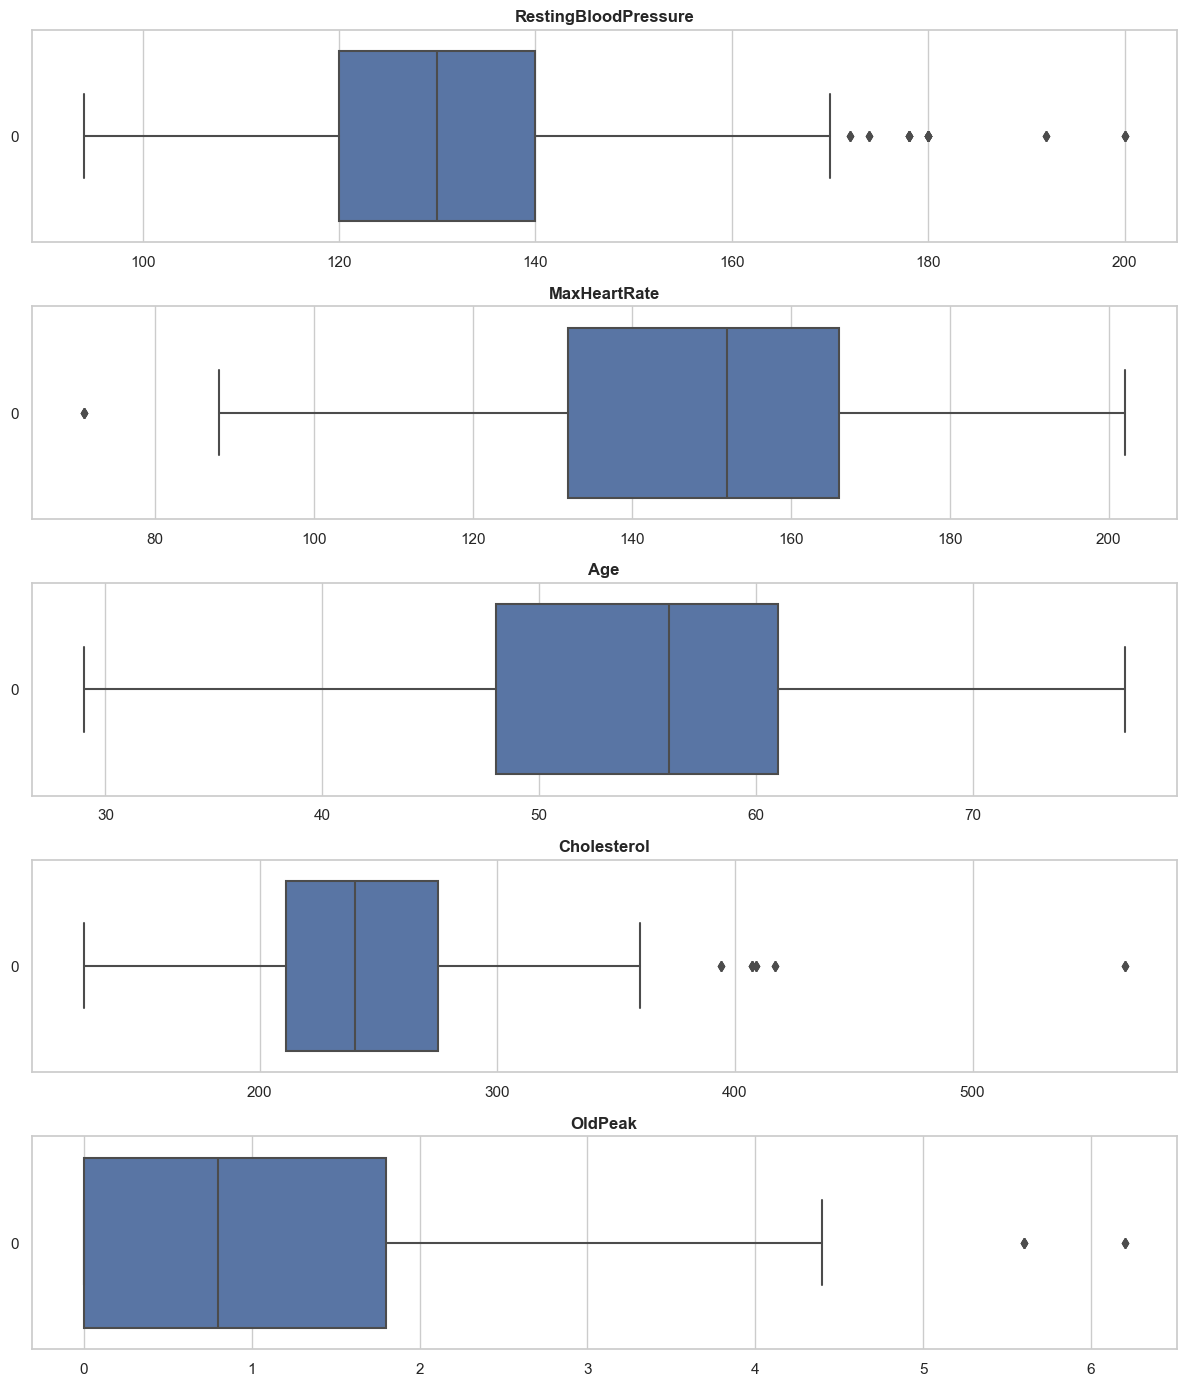

In [16]:
# checking for outliers

fig, axes = plt.subplots(5,1,figsize=(12,14))
tickers = ["RestingBloodPressure","MaxHeartRate","Age","Cholesterol","OldPeak"]

for n, ticker in enumerate(tickers):
    sns.set(style="whitegrid")
    sns.boxplot(df[tickers[n]],orient="h",ax=axes[n])
    axes[n].set_title(tickers[n],fontweight='bold')
fig.tight_layout(pad=1.0)
plt.show()

In [17]:
# Columns to remove outliers from
columns_to_check = ["RestingBloodPressure", "MaxHeartRate", "Age", "Cholesterol", "OldPeak"]

# Function to remove outliers using IQR for specific columns
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers only for the specified columns
    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    
    return df_filtered

# Print the shape of the data before removing outliers
print("Shape of data before removing outliers:", df.shape)

# Remove outliers from specific columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Print the shape of the data after removing outliers
print("Shape of data after removing outliers:", df_cleaned.shape)


Shape of data before removing outliers: (1025, 14)
Shape of data after removing outliers: (968, 14)


There are some outliers so we removed it.

Target variable is balanced.

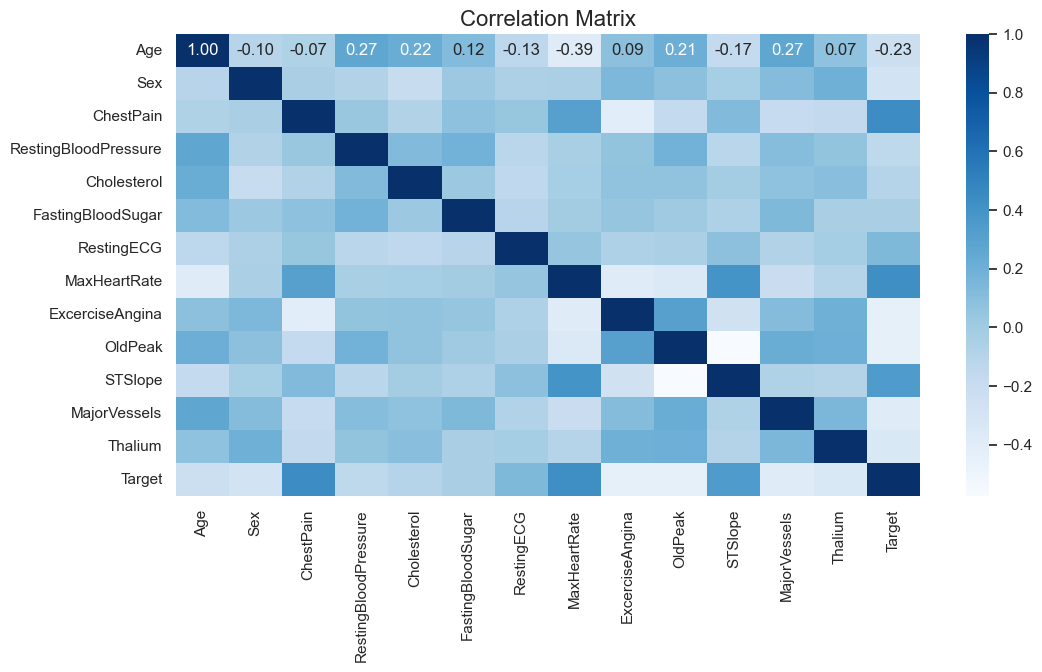

In [18]:
# correlation matrix

df_correlation = df.corr()

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [19]:
df.corr()['Target'].sort_values(ascending=False)

Target                  1.000000
ChestPain               0.434854
MaxHeartRate            0.422895
STSlope                 0.345512
RestingECG              0.134468
FastingBloodSugar      -0.041164
Cholesterol            -0.099966
RestingBloodPressure   -0.138772
Age                    -0.229324
Sex                    -0.279501
Thalium                -0.337838
MajorVessels           -0.382085
ExcerciseAngina        -0.438029
OldPeak                -0.438441
Name: Target, dtype: float64

* Variables like ChestPain, MaxHeartRate, and STSlope shows moderate positive correlation with Target variable.


* RestingBloodPressure, Age, Sex, Thalium, MajorVessels, ExcerciseAngina, and OldPeak shows moderate negative correlation


* Low or No correlation: FastingBloodSugar, and Cholesterol shows low correlation, Thalium also shows weak correlations with other variables, except for a moderate positive correlation with Sex.


* Age and RestingBloodPressure shows a positive correlation of 0.27 indicating that older people tends to have higher blood pressure.


* MaxHeartRate and Age shows negative correlation as maximum heart rate lowers with age.


* ExcerciseAngina and ChestPain shows moderate negative correlation indicating that those who experience angina during exercise are less likely to have typical angina chest pain type.

## Feature Engineering - One hot encoding and label encoding

In [20]:
# Apply Label Encoding to ordinal columns if needed
ordinal_columns = ['ChestPain', 'STSlope']
label_encoders = {}

for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply One-Hot Encoding to nominal columns
nominal_columns = ['RestingECG', 'ExcerciseAngina', 'MajorVessels', 'Thalium']
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

## Train-test split

In [21]:
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(717, 19) (308, 19)
(717,) (308,)


## StandardScaler

In [23]:
# Scale the numerical features
numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Model Building

In [24]:
from sklearn.neighbors import KNeighborsClassifier


In [25]:
# Define models
models = [
    LogisticRegression(),
    RandomForestClassifier(max_depth=7,criterion='gini'),
    GaussianNB(),
    SVC(probability=True),
    DecisionTreeClassifier(max_depth=7)
]

# Initialize lists to store metrics
acc_score = []
precision = []
recall = []
f1 = []
roc_score = []
name_model = []

In [26]:
# Iterate through each model and calculate metrics
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc_score.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc_score.append(roc_auc_score(y_test, y_proba))
    name_model.append(type(model).__name__)

In [27]:
# Create a DataFrame with the results
result = pd.DataFrame(
    {'Model Name': name_model,
     'Accuracy': acc_score,
     'Precision': precision,
     'Recall': recall,
     'F1-Score': f1,
     'ROC AUC': roc_score}
)

# Sort the DataFrame by F1-Score
result = result.sort_values('F1-Score', ascending=False)
print(result)

               Model Name  Accuracy  Precision    Recall  F1-Score   ROC AUC
1  RandomForestClassifier  0.954545   0.947020  0.959732  0.953333  0.995990
4  DecisionTreeClassifier  0.938312   0.939189  0.932886  0.936027  0.964396
3                     SVC  0.889610   0.840237  0.953020  0.893082  0.958381
0      LogisticRegression  0.834416   0.791667  0.892617  0.839117  0.916044
2              GaussianNB  0.811688   0.786164  0.838926  0.811688  0.887025


* RandomForestClassifier is the top performing model with accuracy of 95.4% and Roc of 0.99, it also achieved perfect recall and perfect precision and making it the most reliable model in terms of correctly identifying positive cases and avoiding false positives.


* DecisionTreeClassifier also performed very well with an accuracy of 93.05% and roc-aus of 0.96, but its recall was slightly lower than randm forest indicating it may miss few true positives.


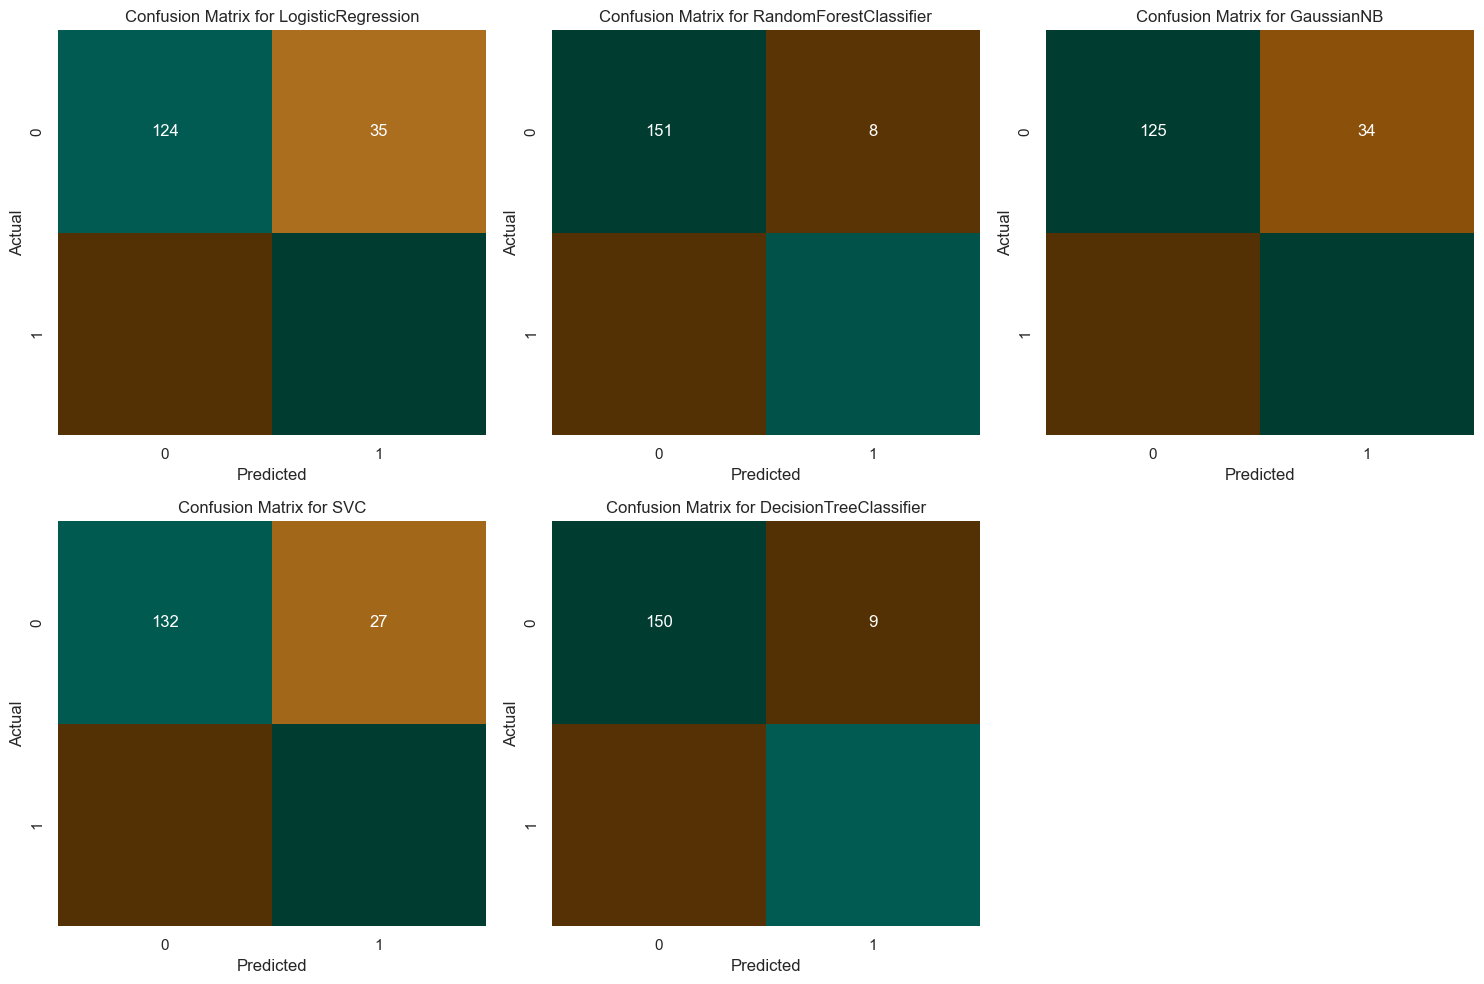

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
for i, model in enumerate(models, 1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BrBG', cbar=False)
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

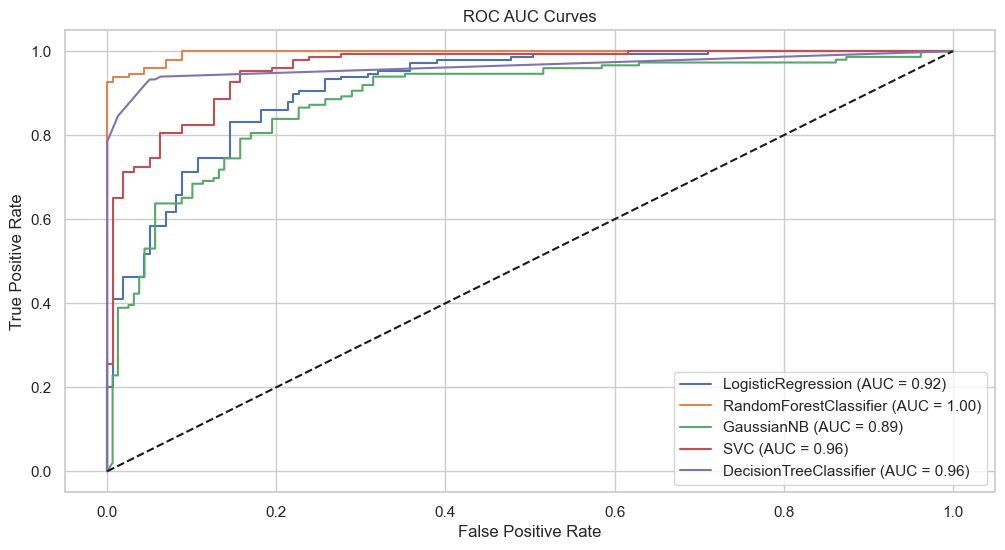

In [29]:
# Plotting the ROC AUC curves

plt.figure(figsize=(12, 6))
for model in models:
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc='lower right')
plt.show()

* Roc Aus curve also suggests Random Forest and Random forest are the superior model for this task.

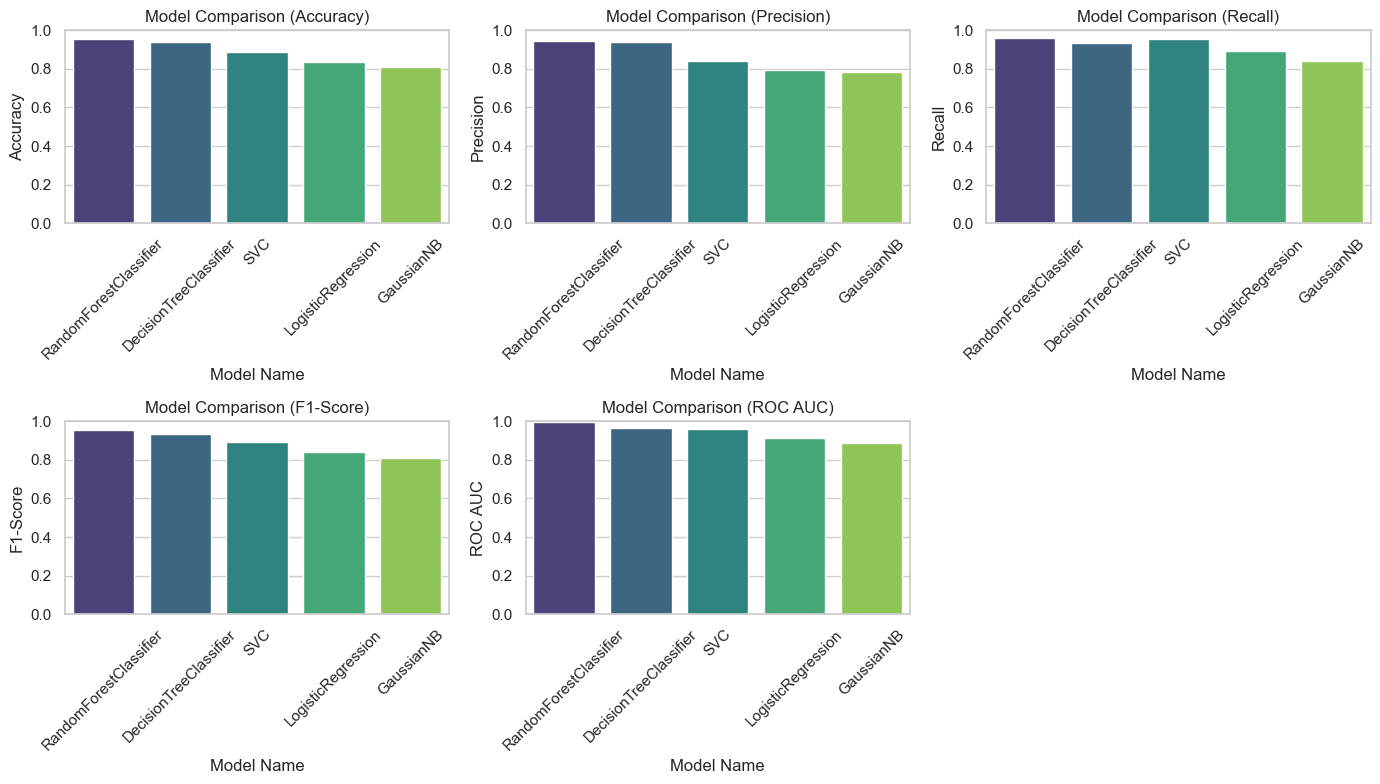

In [30]:
# Plotting the model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model Name', y=metric, data=result, palette='viridis')
    plt.title(f'Model Comparison ({metric})')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  

plt.tight_layout()
plt.show()

## Hyperparameter tuning for logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

lr = LogisticRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_search_lr.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 Score for Logistic Regression:", grid_search_lr.best_score_)

After hyperparameter tuning we can see improvement in logistic regression before f1 was 83 and after it is 88.

### Hyperparameter tuning for SVC

In [32]:
# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'probability': [True]
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_search_svc.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters for SVC:", grid_search_svc.best_params_)
print("Best F1 Score for SVC:", grid_search_svc.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END C=0.1, degree=2, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, kernel=linear, probability=True; total time=   0.1s
[CV] END C=0.1, degree=2, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, kernel=linear, probability=True; total time=   0.1s
[CV] END C=0.1, degree=2, gamma=scale, kernel=poly, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, kernel=poly, probability=True; total time=   0.1s
[CV] END C=0.1, degree=2, gamma=scale, kernel=poly, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, kernel=poly, probability=True; total time=   0.1s
[CV] END C=0.1, degree=2, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END C=0.1, degree=2, gamma=scale, 

* Befor hyperparameter tuning f1 for svc was 89 and after it is 96.